In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
from collections import defaultdict

## Chinese Restraurant Process Simulation

In [3]:
def chinese_restaurant_process(num_people, alpha):
    if num_people <= 0:
        return []
    
    # The First customer is assigned to table 0
    table_assignments = [0]
    # Table counts
    table_counts = defaultdict(int)
    table_counts[0] += 1
    #Name of the next table
    next_table = 1
    
    
    for i in xrange(num_people - 1):
        probabilities = [table_counts[table] / (len(table_assignments) + alpha) for table in xrange(next_table)]
        probabilities.append(alpha / (len(table_assignments) + alpha))
        assignment = np.random.multinomial(1, probabilities).argmax()
        
        table_assignments.append(assignment)
        table_counts[assignment] += 1
        
        if assignment == next_table:
            next_table += 1
    
    return np.array(table_assignments)
        

In [4]:
def plot_chinese_process(num_people, alpha):
    plt.title('Simulation of Chinese Restaurant Process where alpha = {} and num cusomers = {}'.format(alpha, num_people))
    plt.ylabel('Table Counts')
    plt.xlabel('Table Number')
    plt.hist(chinese_restaurant_process(num_people, 1.))
    plt.show()
    

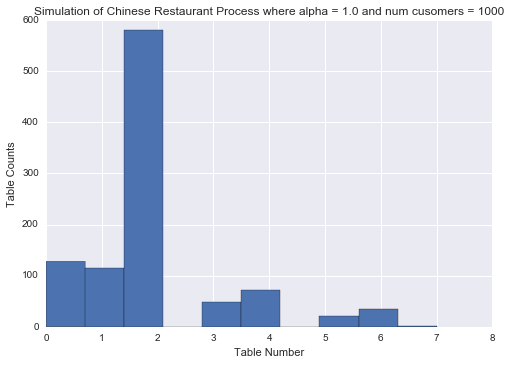

In [5]:
plot_chinese_process(1000, 1.)

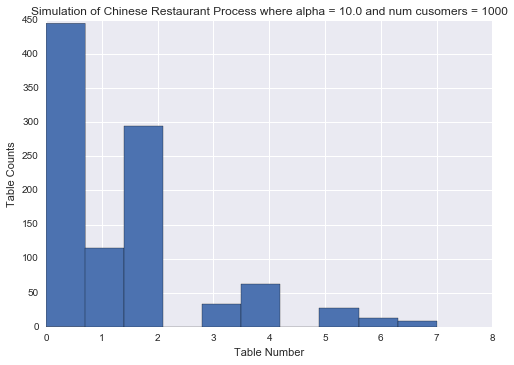

In [6]:
plot_chinese_process(1000, 10.)

## Polya Urn Model

In [7]:
def polya_urn_model(base_color_distribution, num_balls, alpha):
    balls = []
    
    for i in xrange(num_balls):
        if np.random.rand() < alpha / (alpha + len(balls)):
            new_color = base_color_distribution()
            balls.append(new_color)
        else:
            ball = np.random.choice(balls, 1)
            balls.append(ball)
    
    return np.array(balls)

In [8]:
def plot_polya_urn(base_color_dist, num_balls, alpha):
    plt.title('Simulation of Polya Urn Model where alpha = {} and num balls = {}'.format(alpha, num_balls))
    plt.ylabel('Density')
    plt.xlabel('Colors')
    sns.kdeplot(polya_urn_model(base_color_dist, num_balls, alpha), shade=True)
    plt.show()

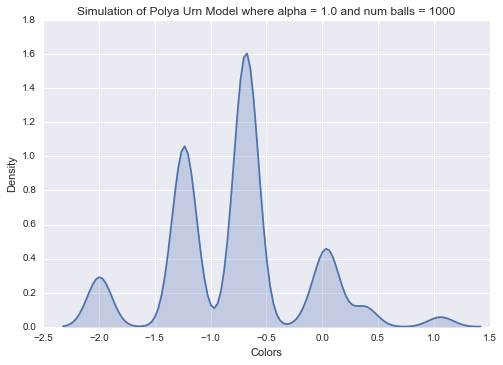

In [18]:
plot_polya_urn(np.random.randn, 1000, 1.)

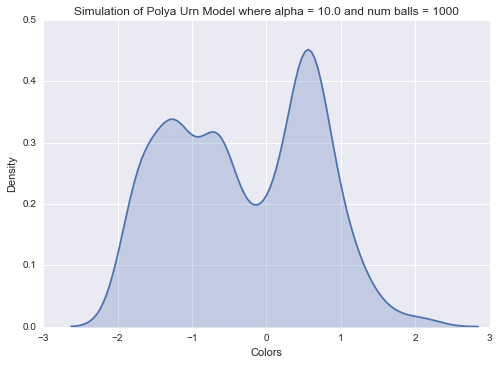

In [10]:
plot_polya_urn(np.random.randn, 1000, 10.)

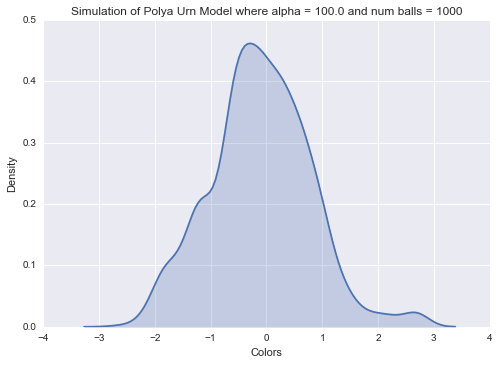

In [11]:
plot_polya_urn(np.random.randn, 1000, 100.)

## Stick Breaking Process

In [12]:
def stick_breaking_process(num_weights, alpha):
    beta_samples = np.random.beta(1., alpha, num_weights)
    remaining_lengths = np.insert(np.cumprod(1 - beta_samples), 0, 1.)[:num_weights]
    weights = remaining_lengths * beta_samples
    return weights

In [13]:
def plot_stick_breaking(num_weights, alpha):
    plt.title('Simulation of Stick Breaking Process where alpha = {}'.format(alpha))
    plt.ylabel('Weight')
    plt.xlabel('Stick')
    sns.barplot(x=range(num_weights), y=stick_breaking_process(num_weights, alpha))
    plt.show()

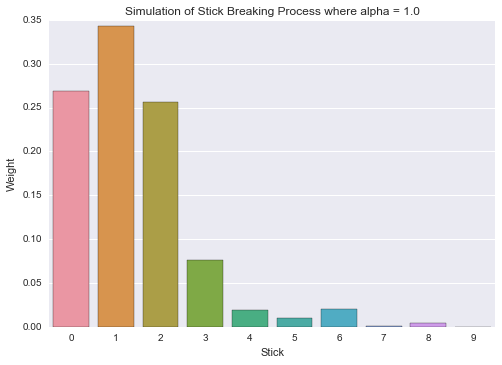

In [14]:
plot_stick_breaking(10, 1.)

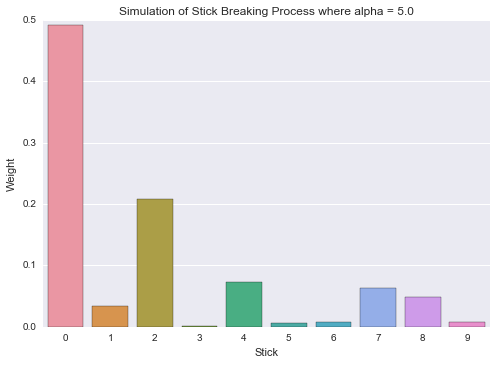

In [15]:
plot_stick_breaking(10, 5.)